In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
from scipy import interpolate
import japanize_matplotlib

In [2]:
cny_elem = np.array([
    [0, 1, 5],
    [1, 2, 6],
    [2, 3, 7],
    [3, 4, 8],
    [1, 6, 5],
    [2, 7, 6],
    [3, 8, 7],
    [5, 6, 9],
    [6, 7, 10],
    [7, 8, 11],
    [6, 10, 9],
    [7, 11, 10],
    [9, 10, 12],
    [10, 11, 13],
    [10, 13, 12],
    [12, 13, 14]
], dtype=int)

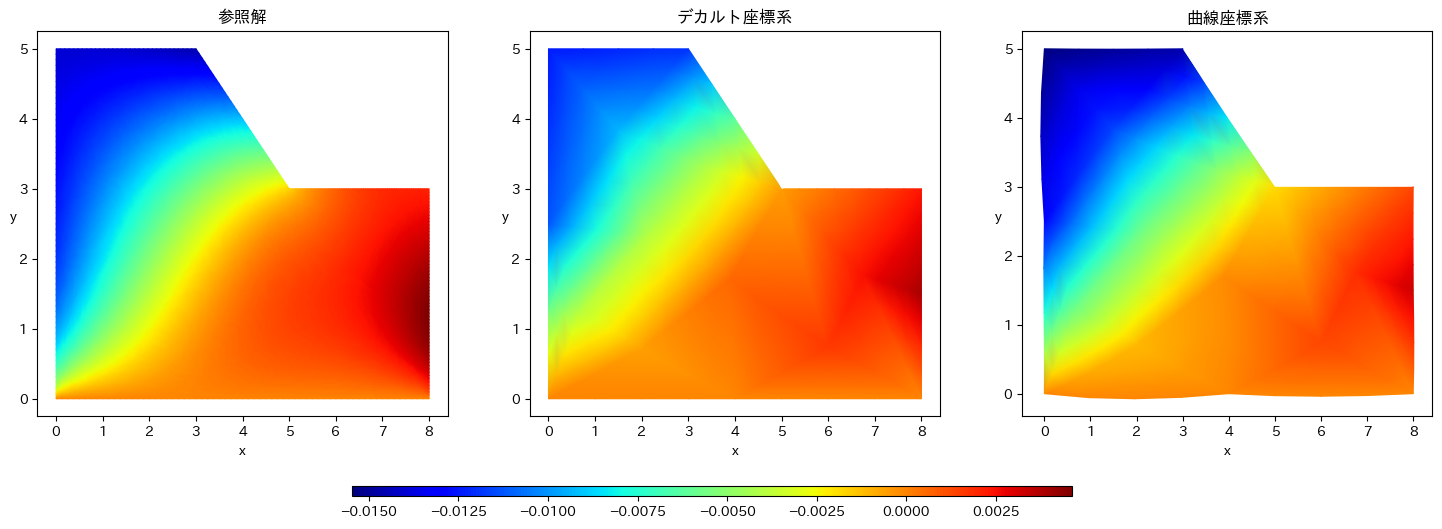

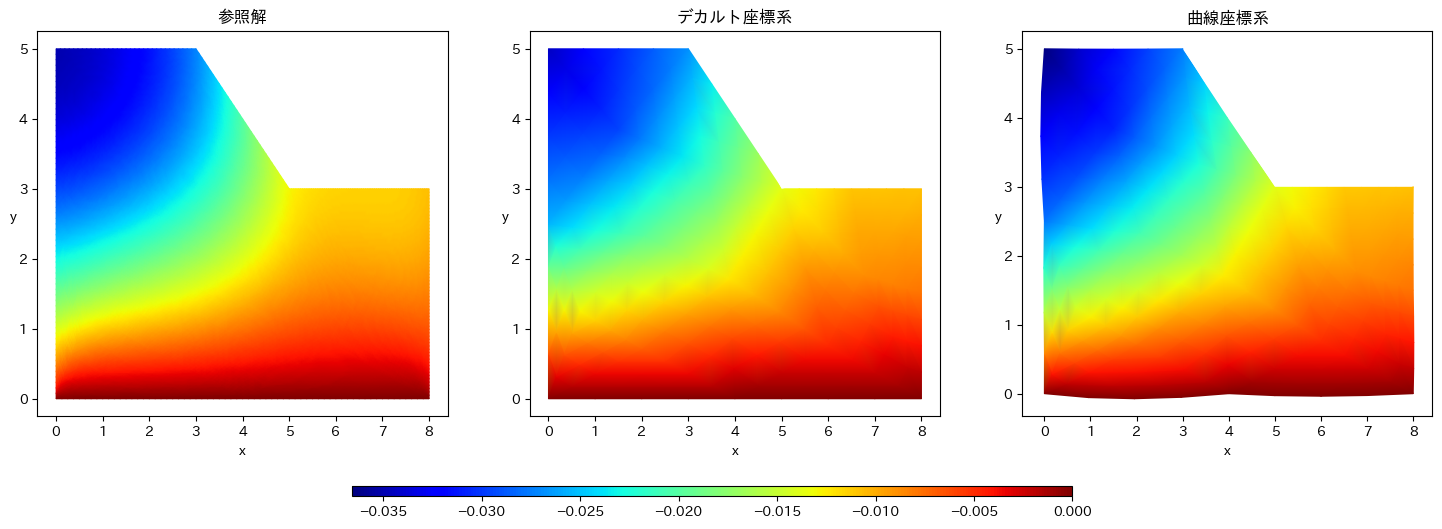

In [3]:
for idx in [0,1]:
    dist_ref = np.loadtxt("ref/displacement_dist_cart_ref.csv")
    points_ref = dist_ref[:,:2]
    dist_ref = dist_ref[:, 2:4]
    
    dist_cart = np.loadtxt("output/displacement_dist_cart.csv")
    points_cart = dist_cart[:,:2]
    dist_cart = dist_cart[:,2:4]

    dist_curv = np.loadtxt("output/displacement_dist_curv.csv")
    points_curv = dist_curv[:,:2]
    dist_curv = dist_curv[:,2:4]
    
    fig = plt.figure(figsize=(18,5))
    axref = fig.add_subplot(1,3,1)
    axcart = fig.add_subplot(1,3,2)
    axcurv = fig.add_subplot(1,3,3)

    vmin = min(np.nanmin(dist_ref[:,idx]), np.nanmin(dist_cart[:,idx]), np.nanmin(dist_curv[:,idx]))
    vmax = max(np.nanmax(dist_ref[:,idx]), np.nanmax(dist_cart[:,idx]), np.nanmax(dist_curv[:,idx]))
    for i in range(len(dist_cart)//15):
        dist_elem = dist_cart[15*i:15*(i+1)]
        points_elem = points_cart[15*i:15*(i+1)]
        axcart.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    for i in range(len(dist_curv)//15):
        dist_elem = dist_curv[15*i:15*(i+1)]
        points_elem = points_curv[15*i:15*(i+1)]
        axcurv.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    for i in range(len(dist_ref)//15):
        dist_elem = dist_ref[15*i:15*(i+1)]
        points_elem = points_ref[15*i:15*(i+1)]
        axref.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    
    axref.set_title("参照解")
    axref.set_xlabel("x")
    axref.set_ylabel("y", rotation=0)

    axcart.set_xlabel("x")
    axcart.set_ylabel("y", rotation=0)
    tri = patches.Polygon([(2, 7), (5, 3), (8, 3.5)], facecolor='white')
    axcart.add_patch(tri)
    axcart.set_title("デカルト座標系")

    axcurv.set_xlabel("x")
    axcurv.set_ylabel("y", rotation=0)
    tri = patches.Polygon([(3, 5), (5, 3), (8, 3)], facecolor='white')
    axcurv.add_patch(tri)
    axcurv.set_title("曲線座標系")

    axpos = axcart.get_position()
    cbar_ax = fig.add_axes([0.3, -0.05, 0.4, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")
    plt.show()

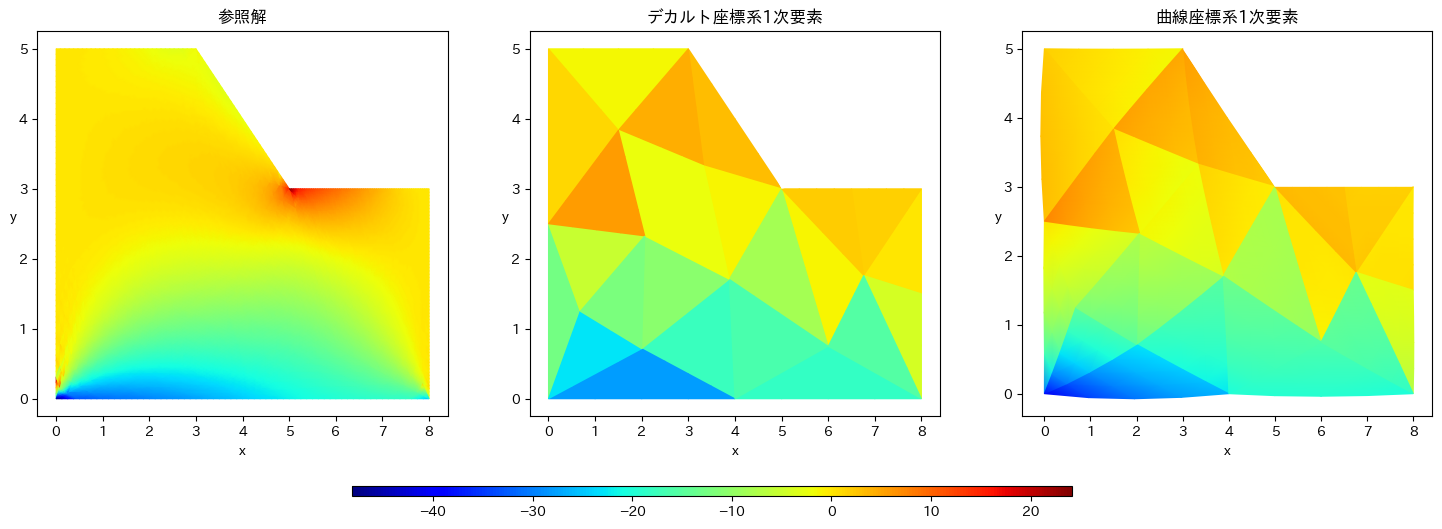

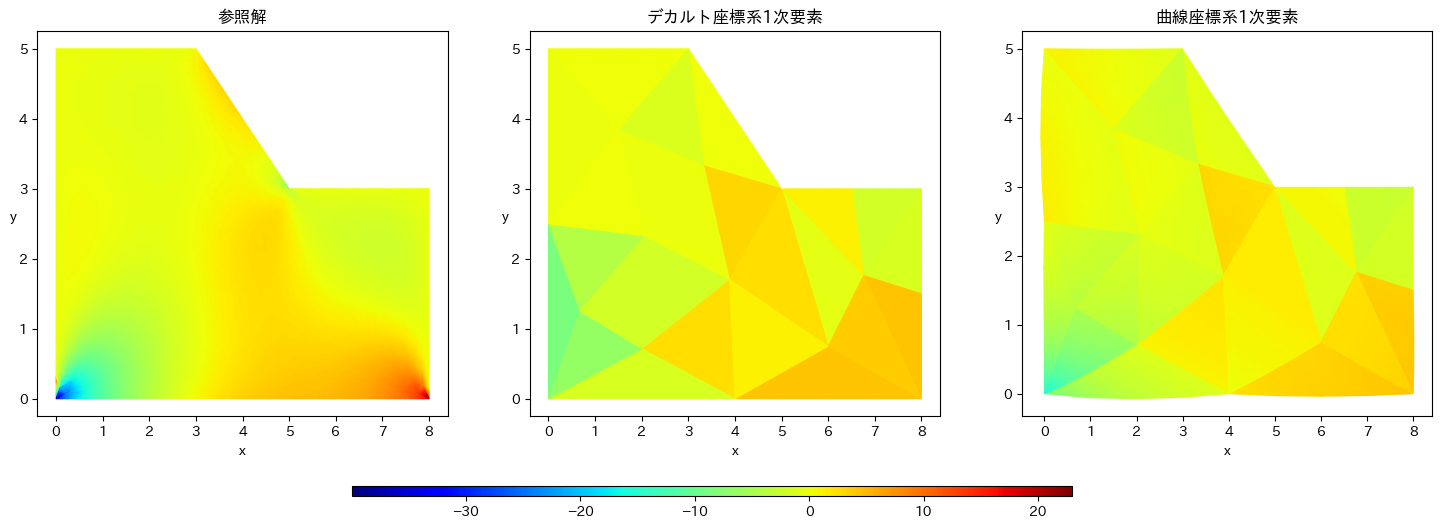

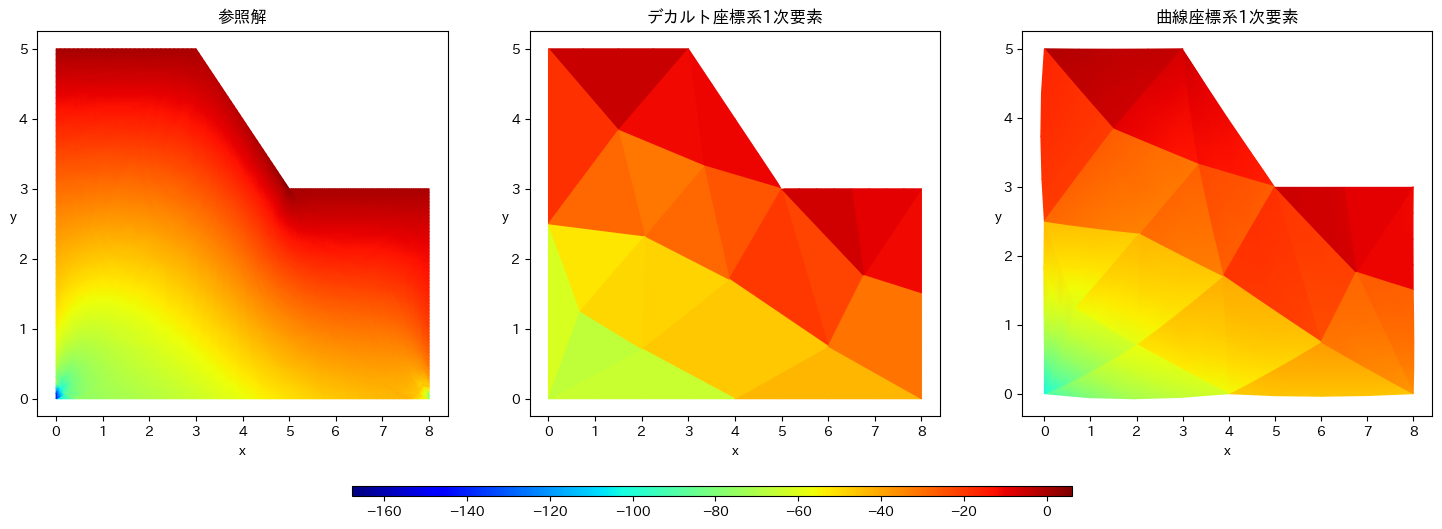

In [4]:
for idx in [0,1,3]:
    dist_ref = np.loadtxt("ref/stress_dist_cart_ref.csv")
    points_ref = dist_ref[:,:2]
    dist_ref = dist_ref[:, 2:6]
    
    dist_cart = np.loadtxt("output/stress_dist_cart.csv")
    points_cart = dist_cart[:,:2]
    dist_cart = dist_cart[:,2:6]

    dist_curv = np.loadtxt("output/stress_dist_curv.csv")
    points_curv = dist_curv[:,:2]
    dist_curv = dist_curv[:,2:6]
    
    fig = plt.figure(figsize=(18,5))
    axref = fig.add_subplot(1,3,1)
    axcart = fig.add_subplot(1,3,2)
    axcurv = fig.add_subplot(1,3,3)

    vmin = min(np.nanmin(dist_ref[:,idx]), np.nanmin(dist_cart[:,idx]), np.nanmin(dist_curv[:,idx]))
    # vmin = -120
    vmax = max(np.nanmax(dist_ref[:,idx]), np.nanmax(dist_cart[:,idx]), np.nanmax(dist_curv[:,idx]))
    # print(vmin, vmax)
    for i in range(len(dist_ref)//15):
        dist_elem = dist_ref[15*i:15*(i+1)]
        points_elem = points_ref[15*i:15*(i+1)]
        axref.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    for i in range(len(dist_cart)//15):
        dist_elem = dist_cart[15*i:15*(i+1)]
        points_elem = points_cart[15*i:15*(i+1)]
        axcart.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    for i in range(len(dist_curv)//15):
        dist_elem = dist_curv[15*i:15*(i+1)]
        points_elem = points_curv[15*i:15*(i+1)]
        axcurv.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    
    axref.set_title("参照解")
    axref.set_xlabel("x")
    axref.set_ylabel("y", rotation=0)

    axcart.set_xlabel("x")
    axcart.set_ylabel("y", rotation=0)
    tri = patches.Polygon([(2, 7), (5, 3), (8, 3.5)], facecolor='white')
    axcart.add_patch(tri)
    axcart.set_title("デカルト座標系1次要素")

    axcurv.set_xlabel("x")
    axcurv.set_ylabel("y", rotation=0)
    tri = patches.Polygon([(3, 5), (5, 3), (8, 3)], facecolor='white')
    axcurv.add_patch(tri)
    axcurv.set_title("曲線座標系1次要素")

    axpos = axcart.get_position()
    cbar_ax = fig.add_axes([0.3, -0.05, 0.4, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")
    plt.show()

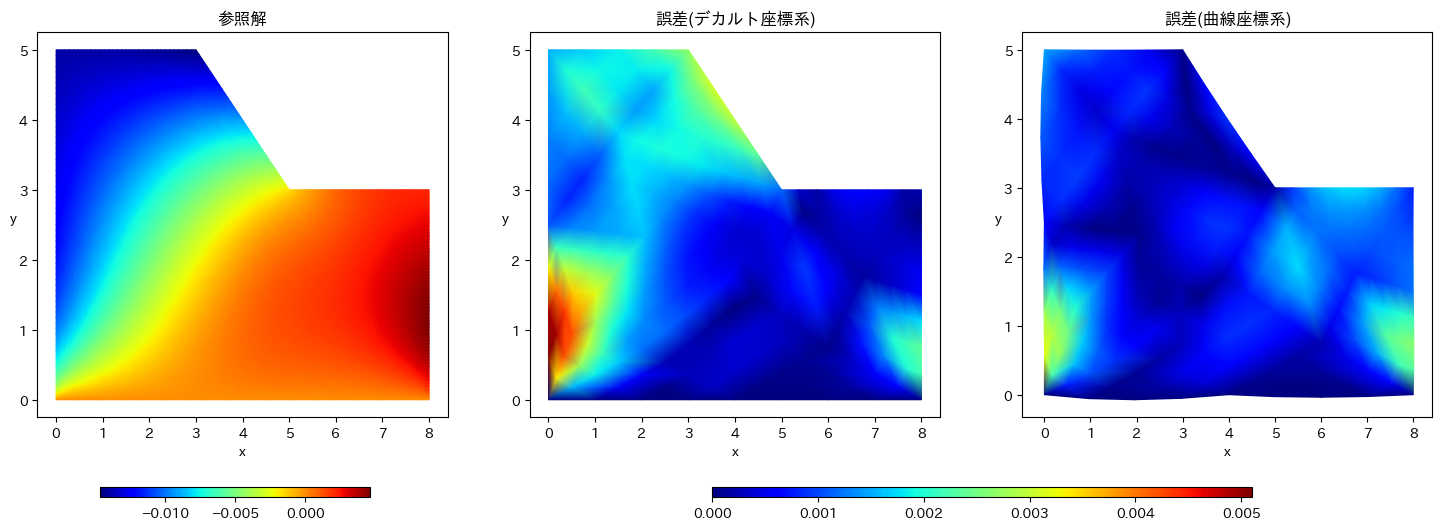

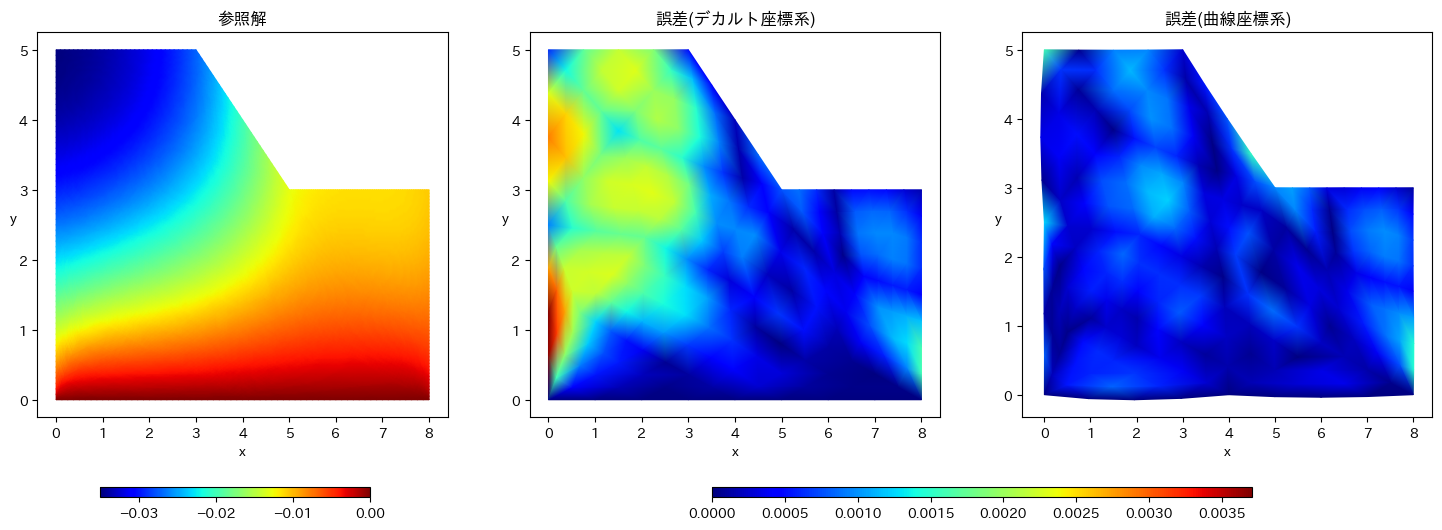

In [5]:
for idx in [0,1]:
    fig = plt.figure(figsize=(18,5))
    axref = fig.add_subplot(1,3,1)
    axcart = fig.add_subplot(1,3,2)
    axcurv = fig.add_subplot(1,3,3)

    dist_ref = np.loadtxt("ref/displacement_dist_cart_ref.csv")
    points_ref = dist_ref[:,:2]
    dist_ref = dist_ref[:,2:4]

    dist_cart = np.loadtxt("output/displacement_dist_cart.csv")
    points_cart = dist_cart[:,:2]
    dist_cart = dist_cart[:,2:4]
    dist_interp_cart = interpolate.griddata(points_ref, dist_ref, points_cart, method="nearest")
    err_cart = abs(dist_cart - dist_interp_cart)[:,idx]

    dist_curv = np.loadtxt("output/displacement_dist_curv.csv")
    points_curv = dist_curv[:,:2]
    dist_curv = dist_curv[:,2:4]
    dist_interp_curv = interpolate.griddata(points_ref, dist_ref, points_curv, method="nearest")
    err_curv = abs(dist_curv - dist_interp_curv)[:,idx]
    
    vmax = max(max(err_cart), max(err_curv))
    vmin = min(min(err_cart), min(err_curv))
    for i in range(len(dist_cart)//15):
        err_elem = err_cart[15*i:15*(i+1)]
        points_elem = points_cart[15*i:15*(i+1)]
        axcart.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")

    
    for i in range(len(dist_curv)//15):
        err_elem = err_curv[15*i:15*(i+1)]
        points_elem = points_curv[15*i:15*(i+1)]
        axcurv.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    axcart.set_xlabel("x")
    axcart.set_ylabel("y", rotation=0)
    axcart.set_title("誤差(デカルト座標系)")
    axcurv.set_xlabel("x")
    axcurv.set_ylabel("y", rotation=0)
    axcurv.set_title("誤差(曲線座標系)")
    cbar_ax = fig.add_axes([0.5, -0.05, 0.3, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")
    
    vmax = max(dist_ref[:,idx])
    vmin = min(dist_ref[:,idx])
    for i in range(len(dist_ref)//15):
        dist_elem = dist_ref[15*i:15*(i+1)]
        points_elem = points_ref[15*i:15*(i+1)]
        axref.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem[:,idx],
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    axref.set_xlabel("x")
    axref.set_ylabel("y", rotation=0)
    axref.set_title("参照解")
    cbar_ax = fig.add_axes([0.16, -0.05, 0.15, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")

    plt.show()

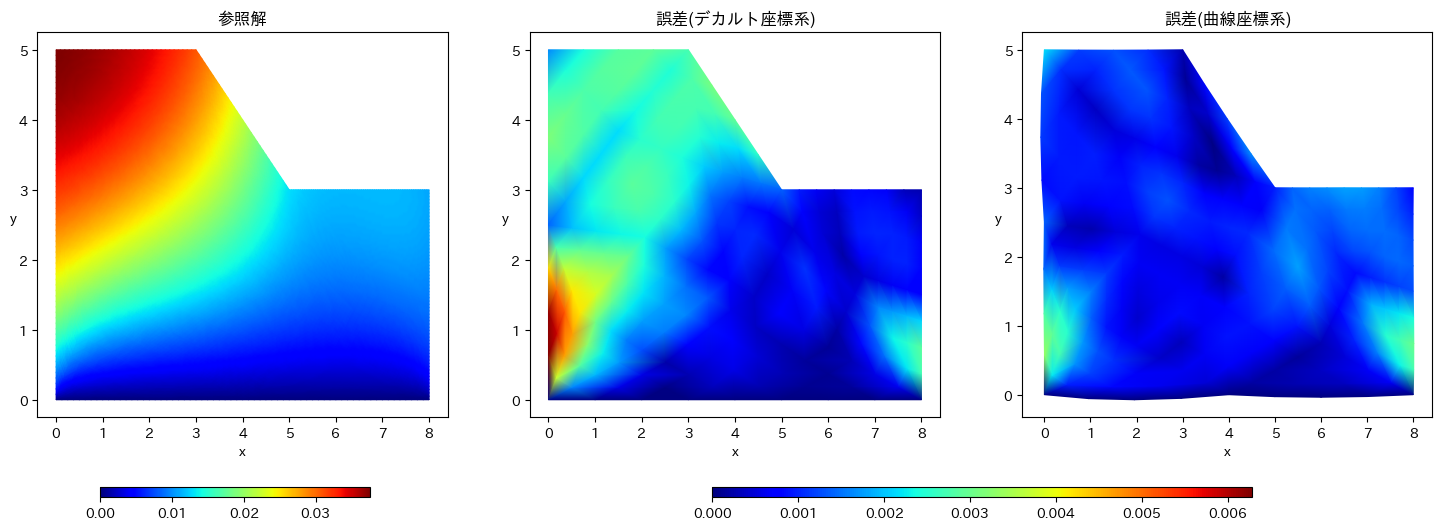

In [6]:
fig = plt.figure(figsize=(18,5))
axref = fig.add_subplot(1,3,1)
axcart = fig.add_subplot(1,3,2)
axcurv = fig.add_subplot(1,3,3)

dist_ref = np.loadtxt("ref/displacement_dist_cart_ref.csv")
points_ref = dist_ref[:,:2]
dist_ref = dist_ref[:,2:4]

dist_cart = np.loadtxt("output/displacement_dist_cart.csv")
points_cart = dist_cart[:,:2]
dist_cart = dist_cart[:,2:4]
dist_interp_cart = interpolate.griddata(points_ref, dist_ref, points_cart, method="nearest")
err_cart = np.linalg.norm(dist_cart - dist_interp_cart, axis=1)

dist_curv = np.loadtxt("output/displacement_dist_curv.csv")
points_curv = dist_curv[:,:2]
dist_curv = dist_curv[:,2:4]
dist_interp_curv = interpolate.griddata(points_ref, dist_ref, points_curv, method="nearest")
err_curv = np.linalg.norm(dist_curv - dist_interp_curv, axis=1)

vmax = max(max(err_cart), max(err_curv))
vmin = min(min(err_cart), min(err_curv))
for i in range(len(dist_cart)//15):
    err_elem = err_cart[15*i:15*(i+1)]
    points_elem = points_cart[15*i:15*(i+1)]
    axcart.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
    cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")


for i in range(len(dist_curv)//15):
    err_elem = err_curv[15*i:15*(i+1)]
    points_elem = points_curv[15*i:15*(i+1)]
    axcurv.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
    cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")

axcart.set_xlabel("x")
axcart.set_ylabel("y", rotation=0)
axcart.set_title("誤差(デカルト座標系)")
axcurv.set_xlabel("x")
axcurv.set_ylabel("y", rotation=0)
axcurv.set_title("誤差(曲線座標系)")
cbar_ax = fig.add_axes([0.5, -0.05, 0.3, 0.02])
norm = colors.Normalize(vmin=vmin,vmax=vmax)
mappable = ScalarMappable(cmap='jet',norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")

dist_ref = np.linalg.norm(dist_ref, axis=1)
vmax = max(dist_ref)
vmin = min(dist_ref)
for i in range(len(dist_ref)//15):
    dist_elem = dist_ref[15*i:15*(i+1)]
    points_elem = points_ref[15*i:15*(i+1)]
    axref.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, dist_elem,
    cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
axref.set_xlabel("x")
axref.set_ylabel("y", rotation=0)
axref.set_title("参照解")
cbar_ax = fig.add_axes([0.16, -0.05, 0.15, 0.02])
norm = colors.Normalize(vmin=vmin,vmax=vmax)
mappable = ScalarMappable(cmap='jet',norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")

plt.show()

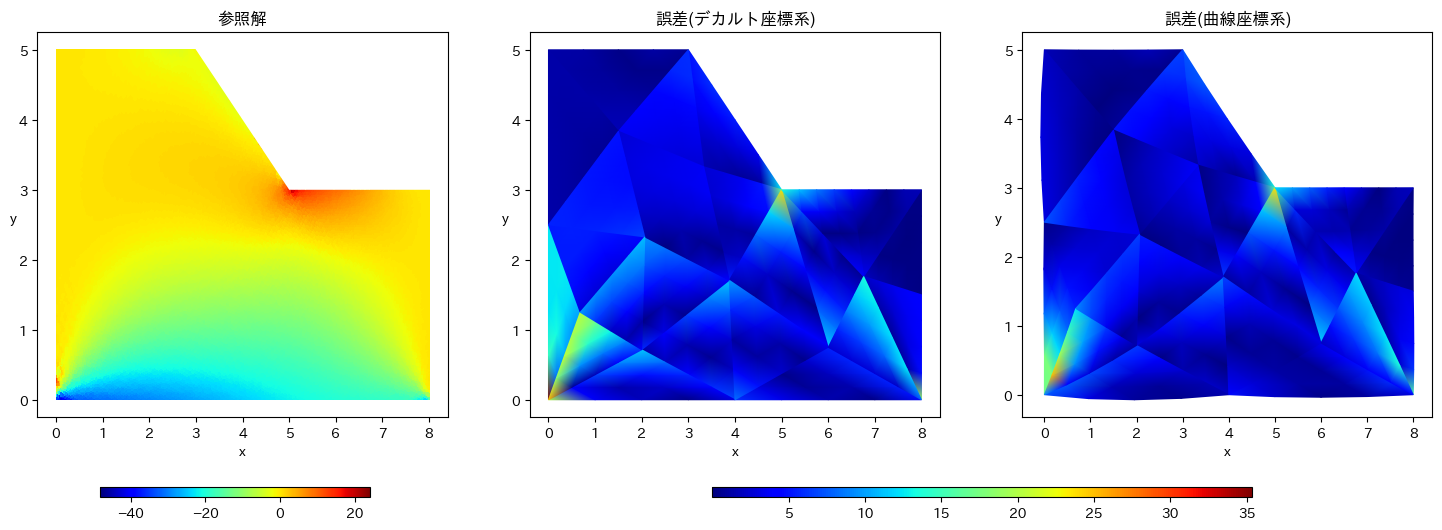

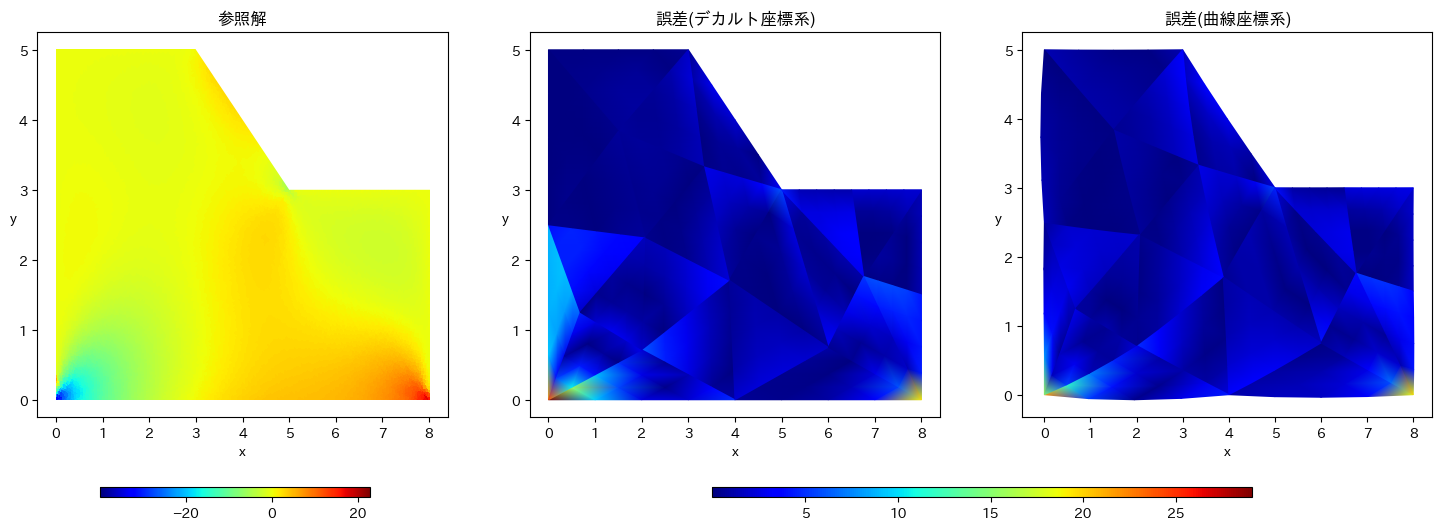

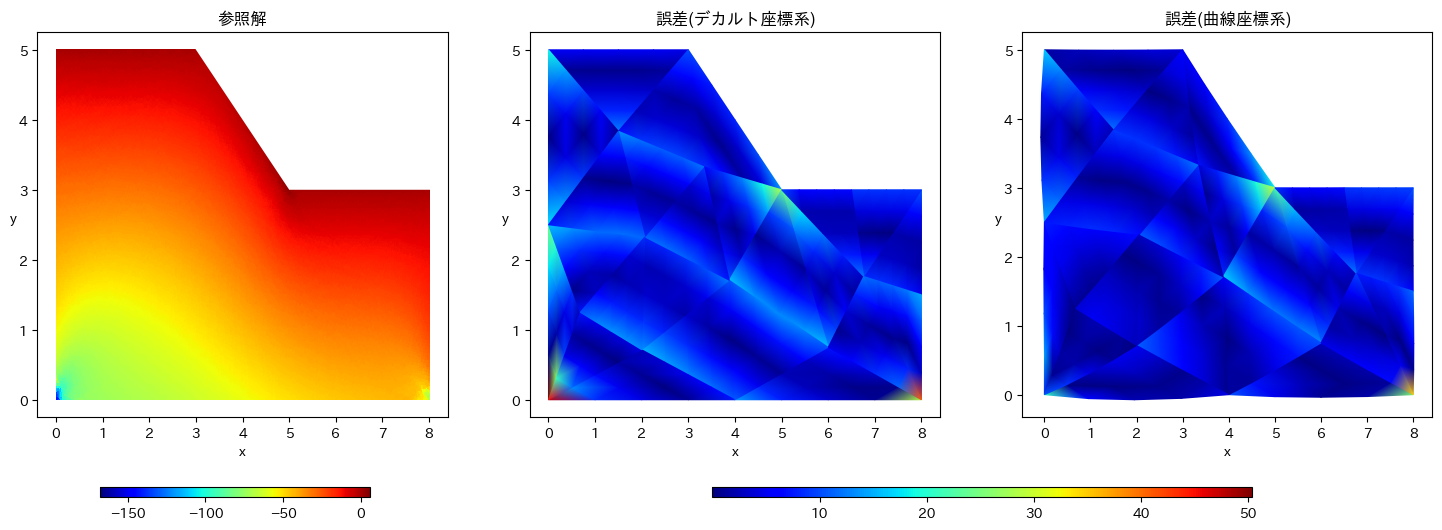

In [7]:
for idx in [0,1,3]:
    fig = plt.figure(figsize=(18,5))
    axref = fig.add_subplot(1,3,1)
    axcart = fig.add_subplot(1,3,2)
    axcurv = fig.add_subplot(1,3,3)

    dist_ref = np.loadtxt("ref/stress_dist_cart_ref.csv")
    points_ref = dist_ref[:,:2]
    dist_ref = dist_ref[:,2:6]

    dist_cart = np.loadtxt("output/stress_dist_cart.csv")
    points_cart = dist_cart[:,:2]
    dist_cart = dist_cart[:,2:6]
    dist_interp_cart = interpolate.griddata(points_ref, dist_ref, points_cart, method="nearest")
    err_cart = abs(dist_cart - dist_interp_cart)[:,idx]

    dist_curv = np.loadtxt("output/stress_dist_curv.csv")
    points_curv = dist_curv[:,:2]
    dist_curv = dist_curv[:,2:6]
    dist_interp_curv = interpolate.griddata(points_ref, dist_ref, points_curv, method="nearest")
    err_curv = abs(dist_curv - dist_interp_curv)[:,idx]
    
    vmax = max(max(err_cart), max(err_curv))
    vmin = min(min(err_cart), min(err_curv))
    for i in range(len(dist_cart)//15):
        err_elem = err_cart[15*i:15*(i+1)]
        points_elem = points_cart[15*i:15*(i+1)]
        axcart.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")

    
    for i in range(len(dist_curv)//15):
        err_elem = err_curv[15*i:15*(i+1)]
        points_elem = points_curv[15*i:15*(i+1)]
        axcurv.tripcolor(points_elem[:,0], points_elem[:,1], cny_elem, err_elem,
        cmap='jet', vmin=vmin, vmax=vmax, shading="gouraud")
    axcart.set_xlabel("x")
    axcart.set_ylabel("y", rotation=0)
    axcart.set_title("誤差(デカルト座標系)")
    axcurv.set_xlabel("x")
    axcurv.set_ylabel("y", rotation=0)
    axcurv.set_title("誤差(曲線座標系)")
    cbar_ax = fig.add_axes([0.5, -0.05, 0.3, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")
    
    vmax = max(dist_ref[:,idx])
    vmin = min(dist_ref[:,idx])
    axref.tripcolor(points_ref[:,0], points_ref[:,1], dist_ref[:,idx], cmap='jet', vmin=vmin, vmax=vmax)
    tri = patches.Polygon([(2, 6), (5, 3), (8.5, 3)], facecolor='white')
    axref.add_patch(tri)
    axref.set_xlabel("x")
    axref.set_ylabel("y", rotation=0)
    axref.set_title("参照解")
    cbar_ax = fig.add_axes([0.16, -0.05, 0.15, 0.02])
    norm = colors.Normalize(vmin=vmin,vmax=vmax)
    mappable = ScalarMappable(cmap='jet',norm=norm)
    mappable._A = []
    fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal")

    plt.show()